## Amazon Bestseller Books Ratings & Top reviews Scraper

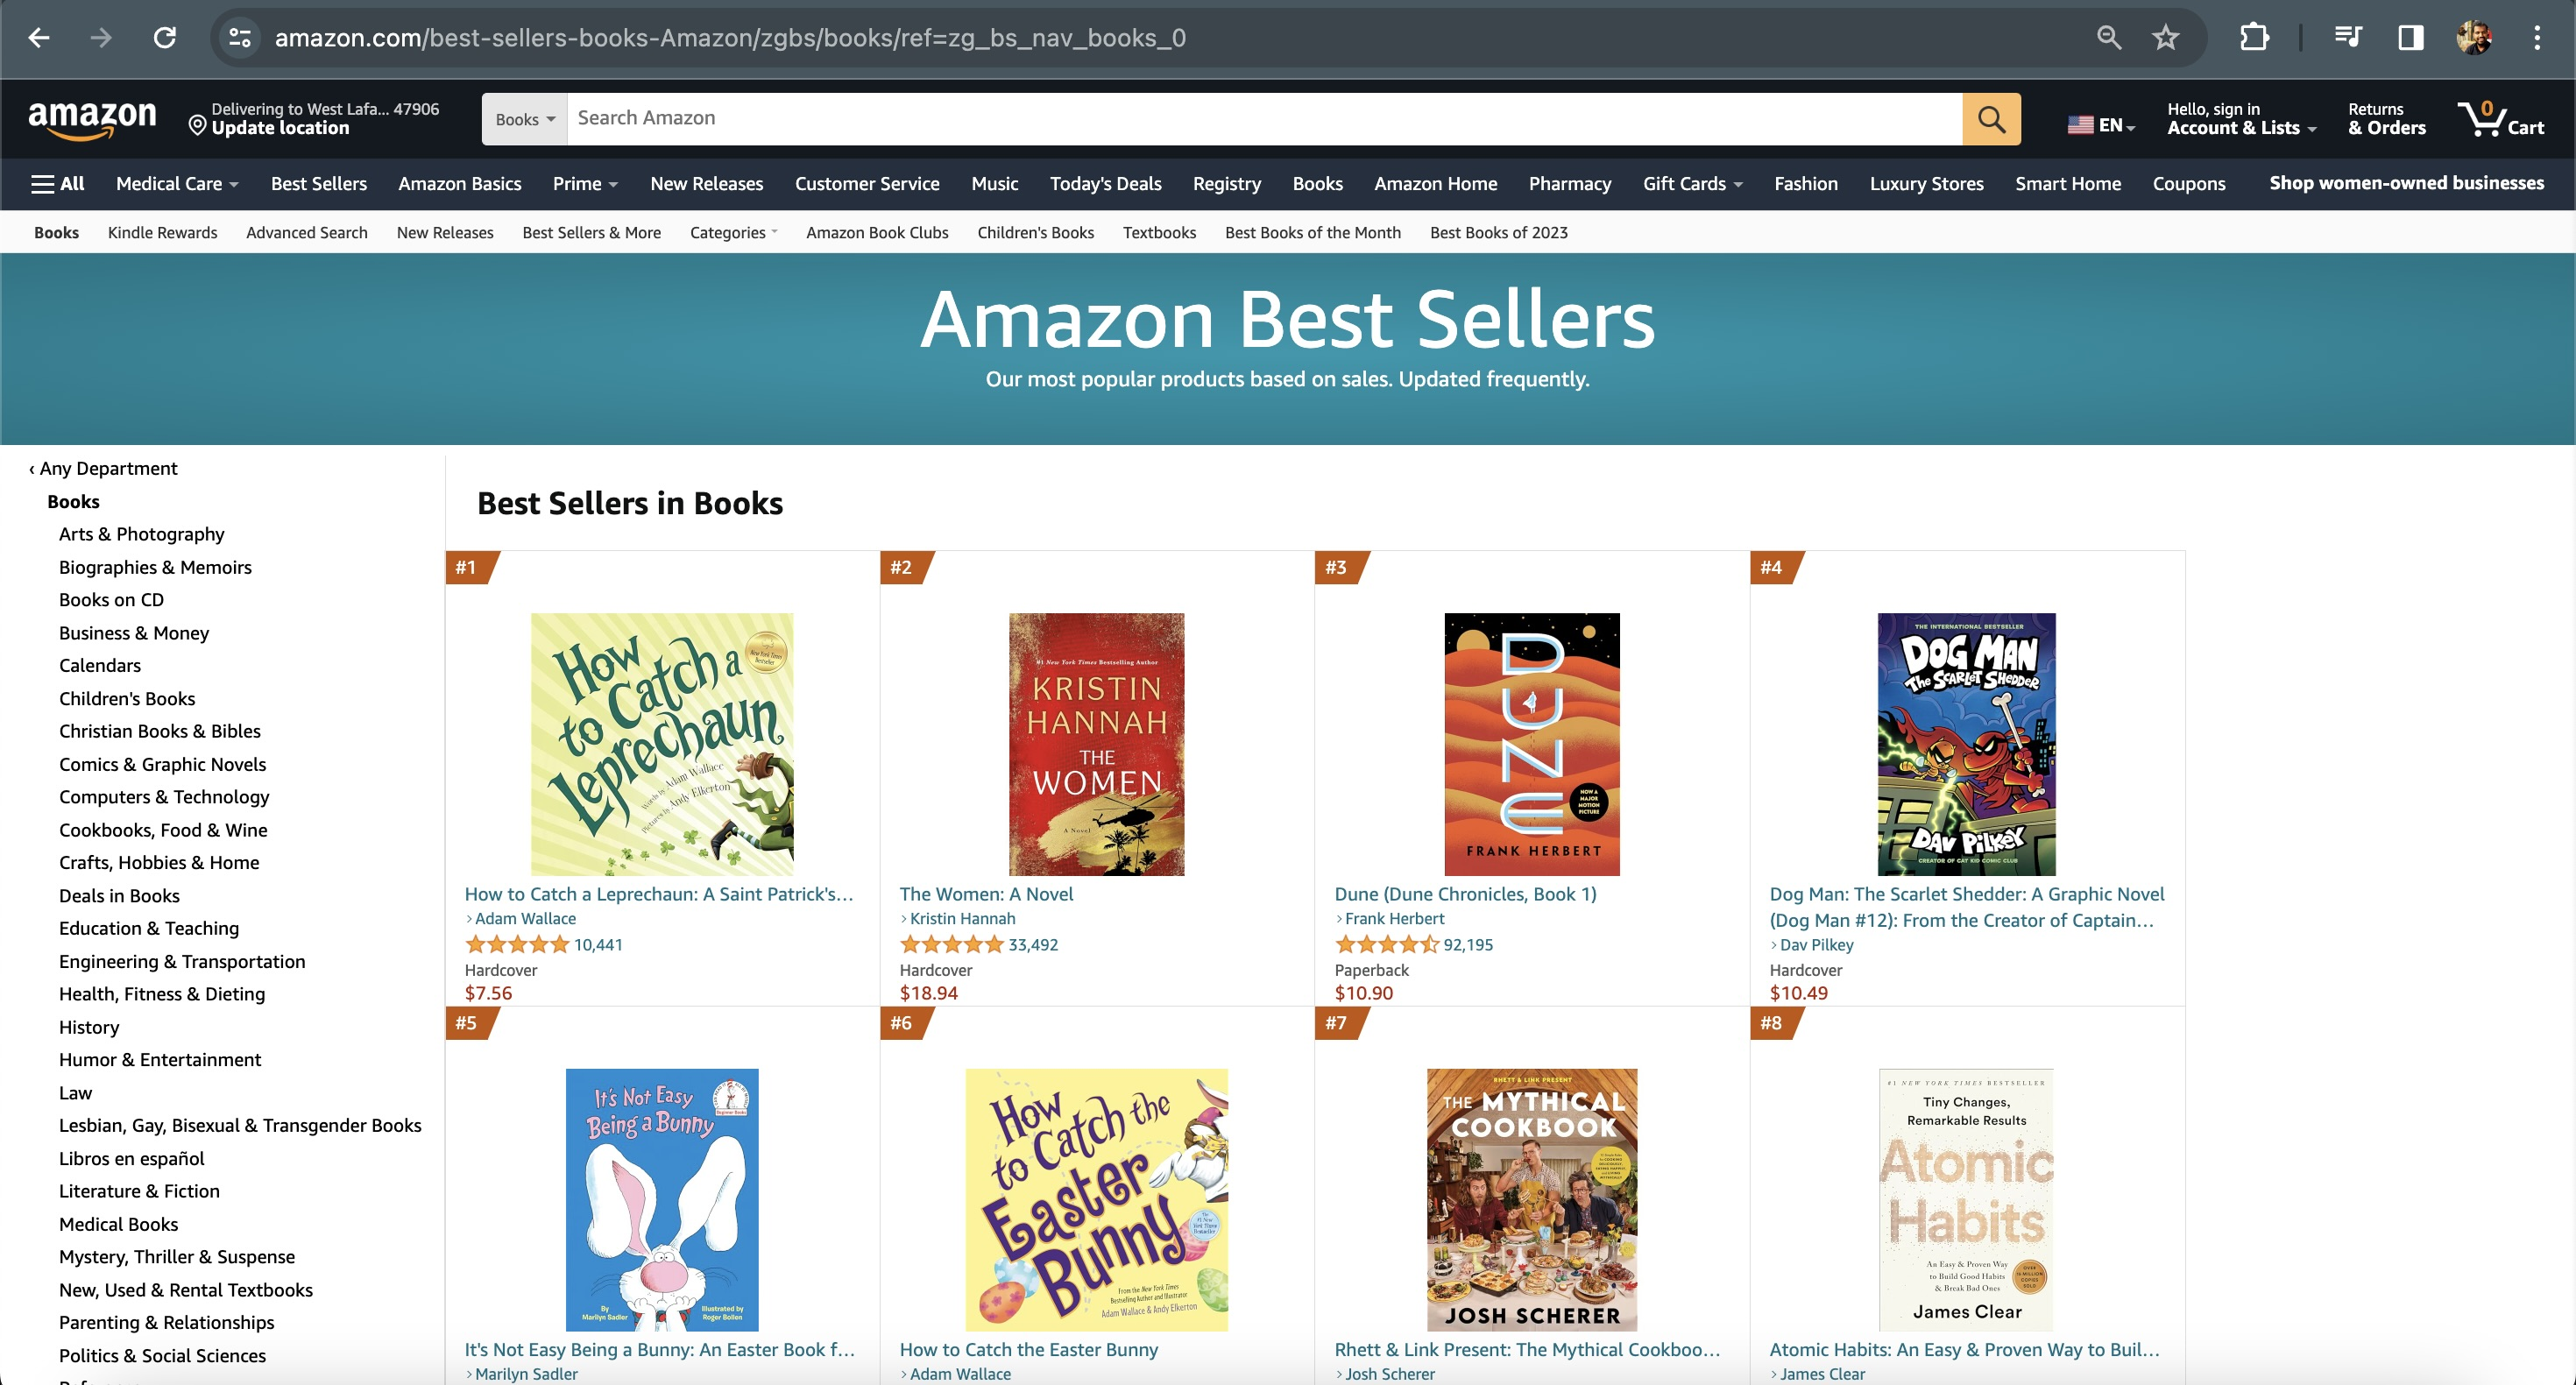

In [259]:
from IPython.display import Image
Image(filename='Files_Directory/Images/amazon-1.jpeg',width=900,height=10)

## Importing Required Libraries

In [147]:
!pip install selenium
!pip3 install webdriver_manager
from bs4 import BeautifulSoup as bs
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import time

## Input URL

In [236]:
url = 'https://www.amazon.com/best-sellers-books-Amazon/zgbs/books/ref=zg_bs_nav_books_0'

## Raw HTML Extractor

In [237]:
def html_base_extract(url):
    
    # Launch Chrome browser
    driver = webdriver.Chrome()
    
    # Open the webpage
    driver.get(url)
    
    # Define the target element to scroll to
    target_element = WebDriverWait(driver, 10).until(
    EC.visibility_of_element_located((By.CLASS_NAME, "navFooterBackToTopText")))

    # Scroll to the target element
    driver.execute_script("arguments[0].scrollIntoView(true);", target_element)

    time.sleep(5) 

    html = driver.page_source # Get the html of the page
    soup = bs(html, 'html.parser')
    driver.quit() 
    
    return soup

## Page URLs Extractor

In [238]:
def page_links(soup):
    
    pg_links = []
    base_url = "https://www.amazon.com"
    relevant = soup.find_all('ul',class_="a-pagination")
    
    for i in relevant:
        block = i.find_all('li')
        
    for li_element in block:
        
        # Find <a> tag within each li_element and extract its href attribute
        a_tag = li_element.find('a')
        if a_tag:
            href = a_tag.get('href')
            pg_links.append(href)
            
    pg_links = list(set(pg_links))
    return pg_links

## Product Details Extractor

In [239]:
def prod_links(pg_links):
    
    base_url = "https://www.amazon.com"
    
    prd_links=[]
    rev_links=[]
    rating = []
    num_ratngs=[]
    price = []
    title = []
    author = []
    for link in pg_links:
        
        url = base_url+link
        print(url)
        pg_html = html_base_extract(url)
        relevant = pg_html.find_all('div',class_="p13n-sc-uncoverable-faceout")
        
        for element in relevant:
            lines = element.find_all('a')
            if len(lines) == 5:
                prd_links.append(lines[0]['href'])
                title.append(lines[1].find_all('span')[-1].get_text())
                author.append(lines[2].find('div',class_='_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y').get_text())
                rev_links.append(lines[3]['href'])
                rating.append(lines[3].find_all('span')[1].get_text())
                num_ratngs.append(lines[3].find_all('span')[-1].get_text())
                price.append(lines[4].find_all('span')[-1].get_text())
                    
    prd_links_n = []
    rev_links_n = []
    for i in range(len(prd_links)):
        prd_links_n.append(base_url+prd_links[i])
        rev_links_n.append(base_url+rev_links[i])
    
    # Create DataFrame
    data = {
        'Product_Links': prd_links_n,
        'Review_Links': rev_links_n,
        'Rating': rating,
        'Number_of_Ratings': num_ratngs,
        'Price': price,
        'Title': title,
        'Author': author
        }

    df = pd.DataFrame(data)
    
    return df
    

## Top Reviews Extractor

In [243]:
def rat_rev_extractor(df):
    
    rev_title = []
    rating = []
    rev_text = []
    title = []
    
    urls = list(df['Review_Links'])
    pdts = list(df['Title'])
    
    for i in range(len(urls)):
        soup = html_base_extract(urls[i])
        reviews = soup.find_all('div',class_='a-section review aok-relative')
        for review in reviews:
            div = review.find_all('div')
            rev_title.append(div[1].find_all('span')[-1].get_text(strip=True))
            rating.append(div[1].find('span',class_='a-icon-alt').get_text(strip=True))
            rev_text.append(div[8].find('span',class_='a-size-base review-text review-text-content').get_text(strip=True))
            title.append(pdts[i])
            
    # Create DataFrame
    data = {
        'Title': title,
        'Rating': rating,
        'Review_title': rev_title,
        'Review_text': rev_text
        }   
    df = pd.DataFrame(data)
    
    return df

In [251]:
# Final function to execute all above functions in sequence
def review_scraper(url):
    soup = html_base_extract(url)
    pages = page_links(soup)
    print('pages:',pages)
    overview_df = prod_links(pages)
    overview_df.head(10)
    overview_df.to_csv('bestsellers.csv', index=False)
    print("Bestsellers data saved to csv file.")
    final_df = rat_rev_extractor(overview_df.head(10))
    final_df.head(10)
    final_df.to_csv('top_reviews.csv',index=False)
    print("Top reviews saved to csv file.")
    return True

In [252]:
# Calling review scraper function to generate output
review_scraper(url)

pages: ['/best-sellers-books-Amazon/zgbs/books/ref=zg_bs_pg_2_books?_encoding=UTF8&pg=2', '/best-sellers-books-Amazon/zgbs/books/ref=zg_bs_pg_1_books?_encoding=UTF8&pg=1']
https://www.amazon.com/best-sellers-books-Amazon/zgbs/books/ref=zg_bs_pg_2_books?_encoding=UTF8&pg=2
https://www.amazon.com/best-sellers-books-Amazon/zgbs/books/ref=zg_bs_pg_1_books?_encoding=UTF8&pg=1
Bestsellers data saved to csv file.


True

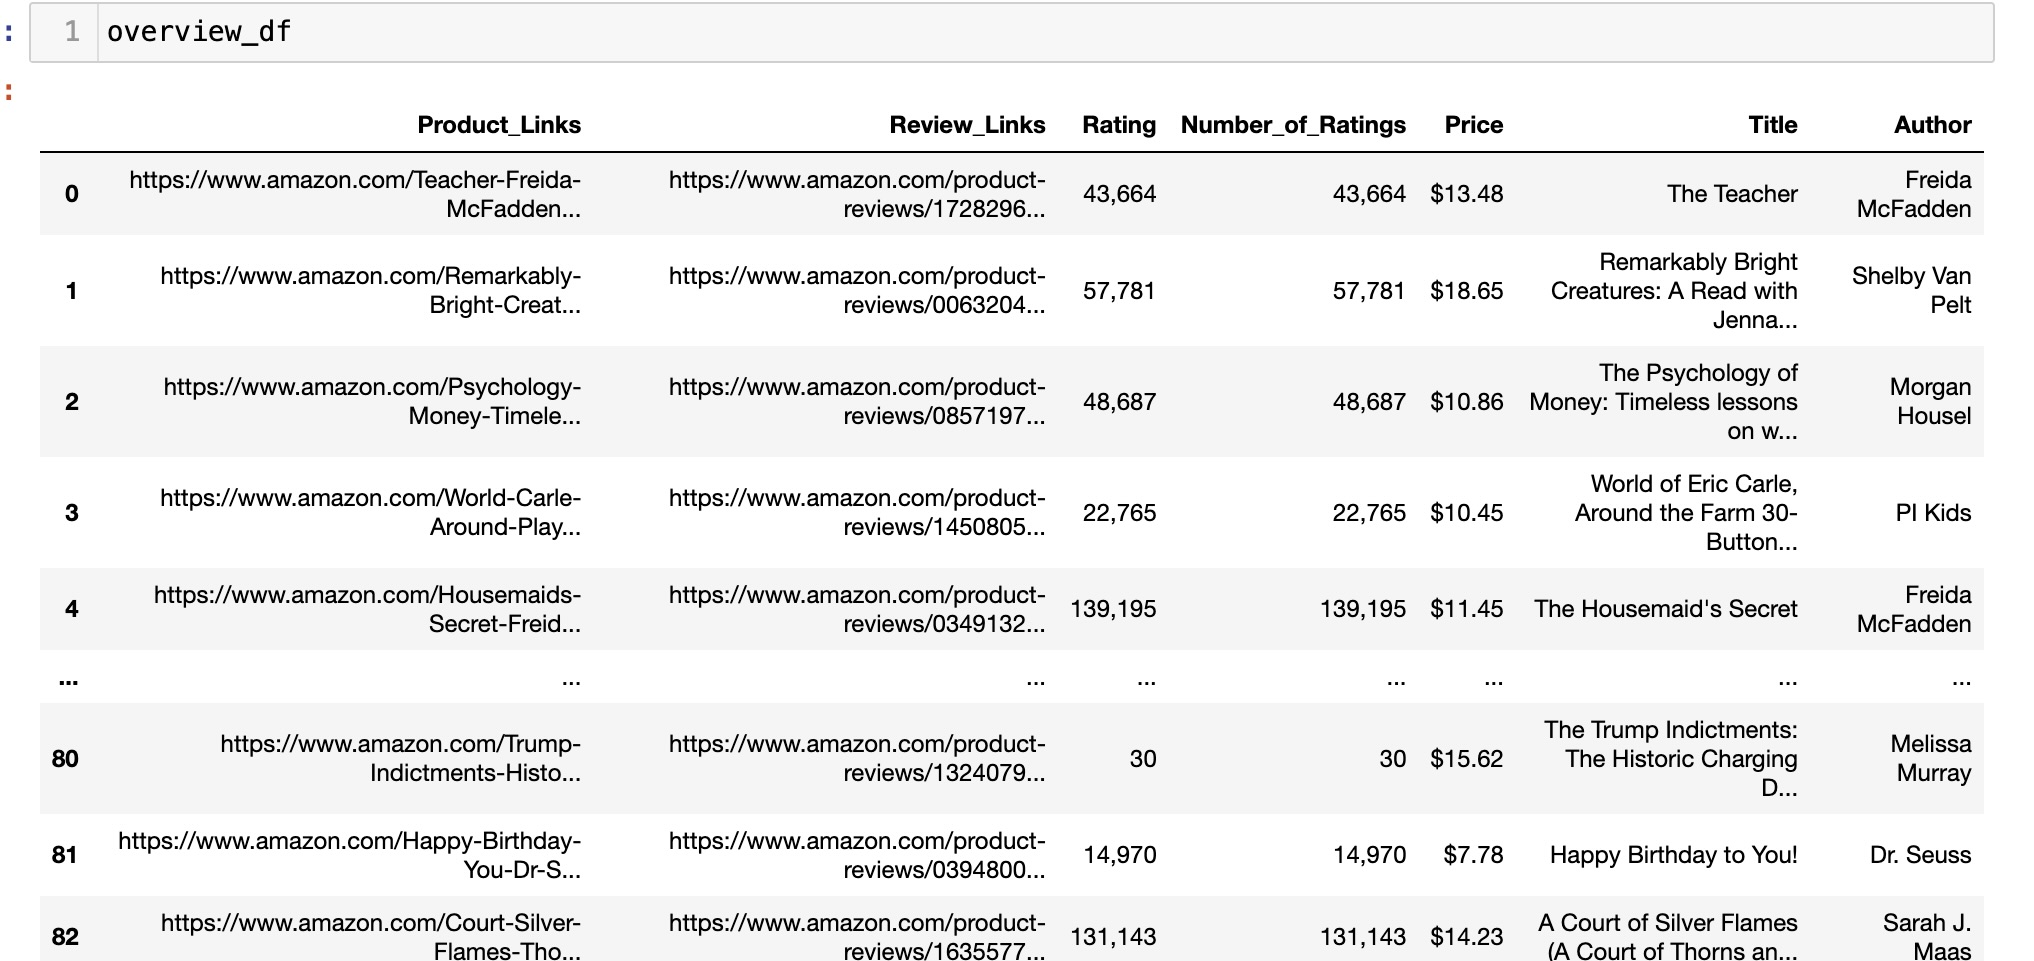

In [263]:
from IPython.display import Image
Image(filename='Files_Directory/Images/amazon-3.jpeg',width=900,height=10)

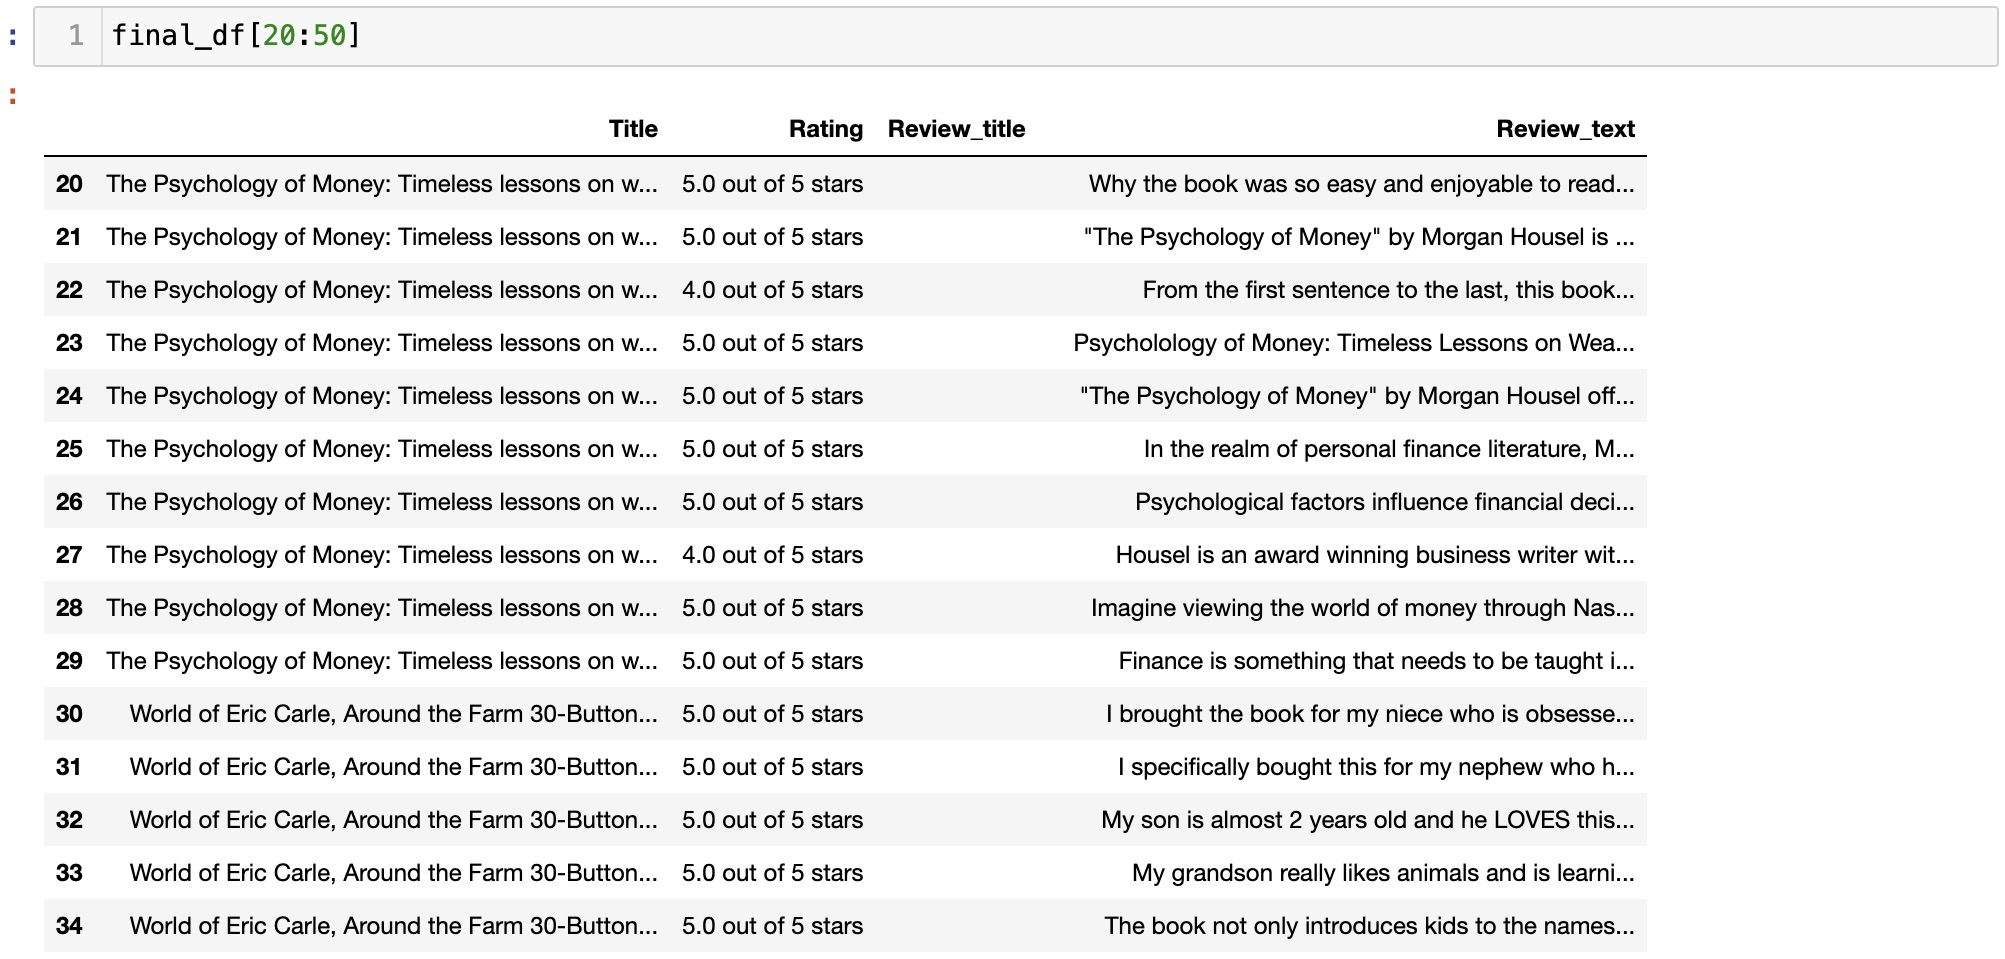

In [267]:
from IPython.display import Image
Image(filename='Files_Directory/Images/amazon-2.jpeg',width=1000,height=10)